In [59]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("D:\\JupyterNotebooks\\data\\ETH-USD_data.csv")

In [86]:
df.shape

(1568, 6)

In [87]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2/23/2022,2639.447021,2741.368408,2587.412842,2590.359619,13382637240
1,2/22/2022,2572.898682,2648.916748,2510.678711,2639.299316,16360200507
2,2/21/2022,2627.665527,2752.458496,2568.254395,2573.816162,18646392740
3,2/20/2022,2763.756592,2763.756592,2585.946289,2628.648438,11641437834
4,2/19/2022,2784.872803,2826.347900,2707.378418,2763.701172,9774183169


In [88]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index, unit='ns')

In [89]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-23,2639.447021,2741.368408,2587.412842,2590.359619,13382637240
2022-02-22,2572.898682,2648.916748,2510.678711,2639.299316,16360200507
2022-02-21,2627.665527,2752.458496,2568.254395,2573.816162,18646392740
2022-02-20,2763.756592,2763.756592,2585.946289,2628.648438,11641437834
2022-02-19,2784.872803,2826.347900,2707.378418,2763.701172,9774183169


In [90]:
from sklearn.model_selection import train_test_split

In [103]:
X = df.drop('Close', axis=1).values
y = df['Close'].values

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

In [104]:
aim = ['Close']

In [105]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('ETH/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

In [106]:
def normal_zero_base(continuous):
    return continuous / continuous[0]+2

In [107]:
X_train = normal_zero_base(X_train)
X_test = normal_zero_base(X_test)
y_train = normal_zero_base(y_train)
y_test = normal_zero_base(y_test)

In [108]:
X_train = np.expand_dims(X_train,axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [98]:
X_train.shape

(1254, 1, 4)

In [58]:
from keras.layers import SimpleRNNCell, RNN

In [100]:
def build_model(input_data, output_size, neurons, act_func='tanh',dropout=0.1, loss='rmse', optimizer='adam'):
    model = Sequential()

    model.add(RNN(cell=[SimpleRNNCell(128), SimpleRNNCell(256), SimpleRNNCell(128)]))

    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(act_func))

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

    return model

np.random.seed(64)
lstm_neurons = 256
epochs=50
batch_size=32
loss = 'mse'
dropout = 0.1
optimizer = 'adam'

In [109]:
model = build_model(X_train,output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)

model_fit = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, shuffle=True)

Epoch 1/50
40/40 [==============================] - 2s 17ms/step - loss: 59.1906 - accuracy: 0.0000e+00 - val_loss: 2.4695 - val_accuracy: 0.0000e+00
Epoch 2/50
40/40 [==============================] - 0s 9ms/step - loss: 58.8738 - accuracy: 0.0000e+00 - val_loss: 2.4695 - val_accuracy: 0.0000e+00
Epoch 3/50
40/40 [==============================] - 0s 10ms/step - loss: 58.8737 - accuracy: 0.0000e+00 - val_loss: 2.4695 - val_accuracy: 0.0000e+00
Epoch 4/50
40/40 [==============================] - 0s 9ms/step - loss: 58.8737 - accuracy: 0.0000e+00 - val_loss: 2.4695 - val_accuracy: 0.0000e+00
Epoch 5/50
40/40 [==============================] - 0s 10ms/step - loss: 58.8737 - accuracy: 0.0000e+00 - val_loss: 2.4695 - val_accuracy: 0.0000e+00
Epoch 6/50
40/40 [==============================] - 0s 9ms/step - loss: 58.8737 - accuracy: 0.0000e+00 - val_loss: 2.4695 - val_accuracy: 0.0000e+00
Epoch 7/50
40/40 [==============================] - 0s 10ms/step - loss: 58.8737 - accuracy: 0.0000e+00

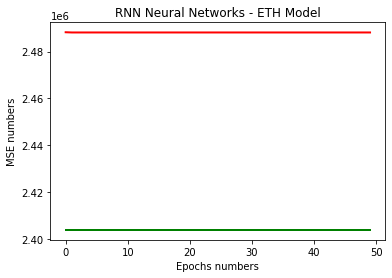

In [102]:
plt.plot(model_fit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(model_fit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('RNN Neural Networks - ETH Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [70]:
preds = model.predict(X_test).squeeze()

8/8 [==============================] - 0s 2ms/step


In [71]:
mean_squared_error

5.224773112667716

In [73]:
mean_absolute_error(y_test,preds)

2.2656116883981343

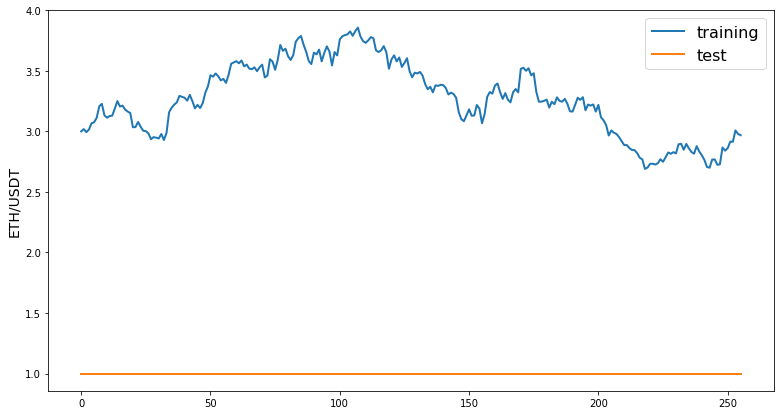

In [76]:
line_plot(y_test, preds, 'training', 'test', title='')